# Logistic Regression on Hearing Test Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head()

age  physical_score  test_result
0  33.0            40.7            1
1  50.0            37.2            1
2  52.0            24.7            0
3  56.0            31.0            0
4  35.0            42.9            1

## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe().T

count      mean        std   min   25%   50%   75%   max
age             5000.0  51.60900  11.287001  18.0  43.0  51.0  60.0  90.0
physical_score  5000.0  32.76026   8.169802  -0.0  26.7  35.3  38.9  50.0
test_result     5000.0   0.60000   0.489947   0.0   0.0   1.0   1.0   1.0

In [6]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

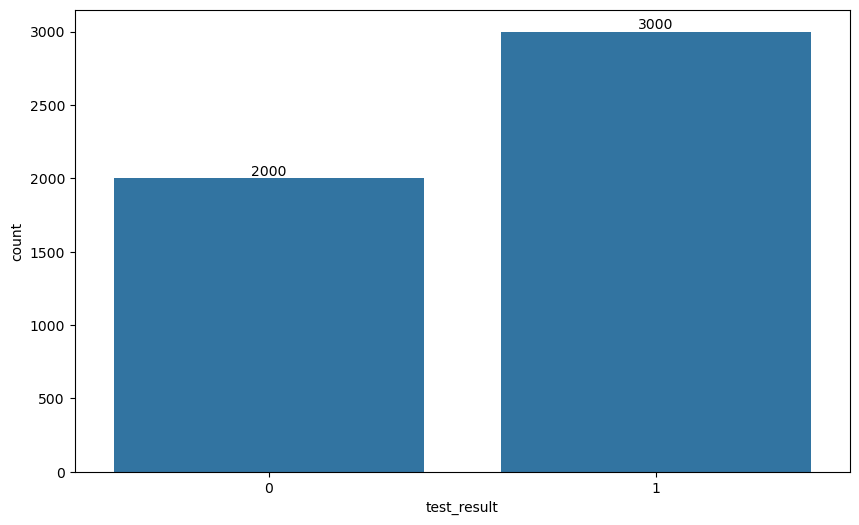

In [7]:
ax = sns.countplot(data=df, x=df['test_result'])
ax.bar_label(ax.containers[0]);

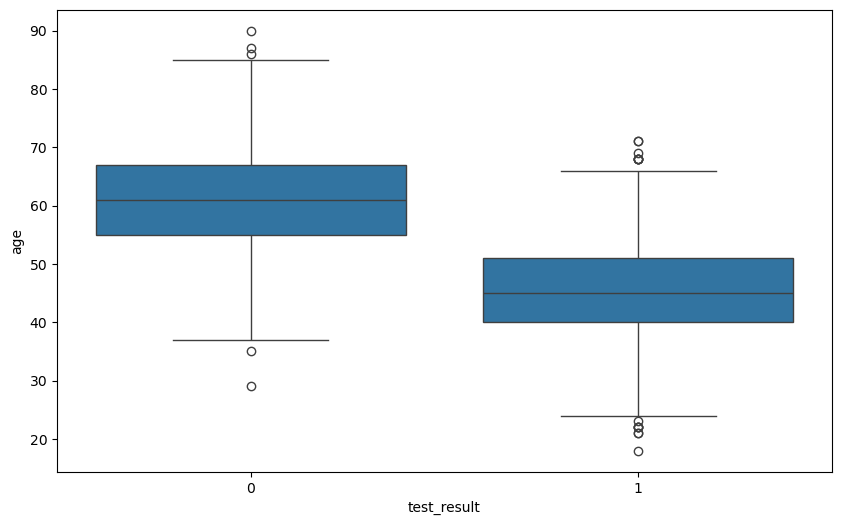

In [8]:
sns.boxplot(x='test_result',y='age',data=df);

# We can say that young people are more likely to pass the test.

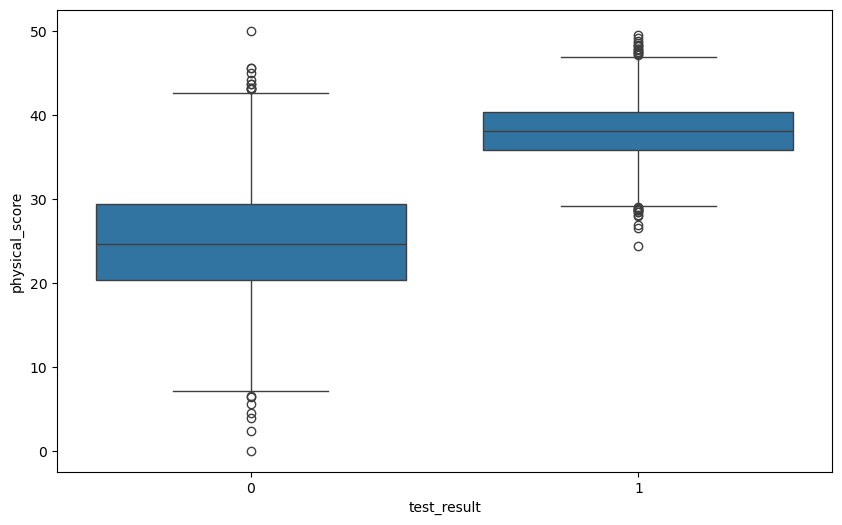

In [9]:
sns.boxplot(x='test_result',y='physical_score',data=df);

# We can say that the higher the physical score, the higher the probability of passing the test.

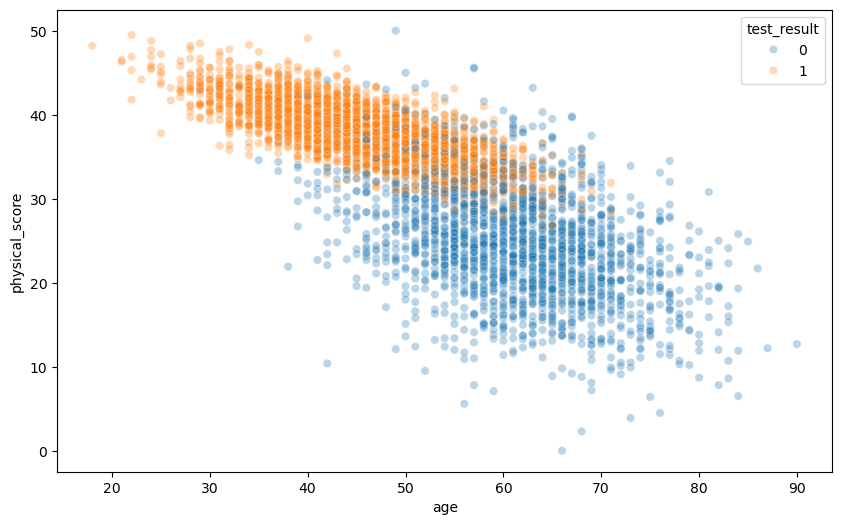

In [10]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.3);

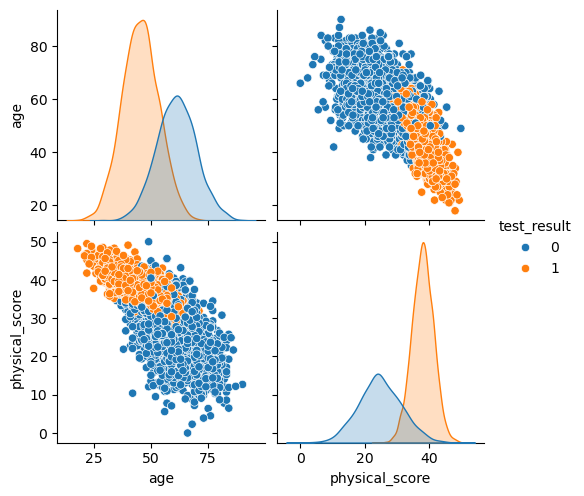

In [11]:
sns.pairplot(df,hue='test_result');

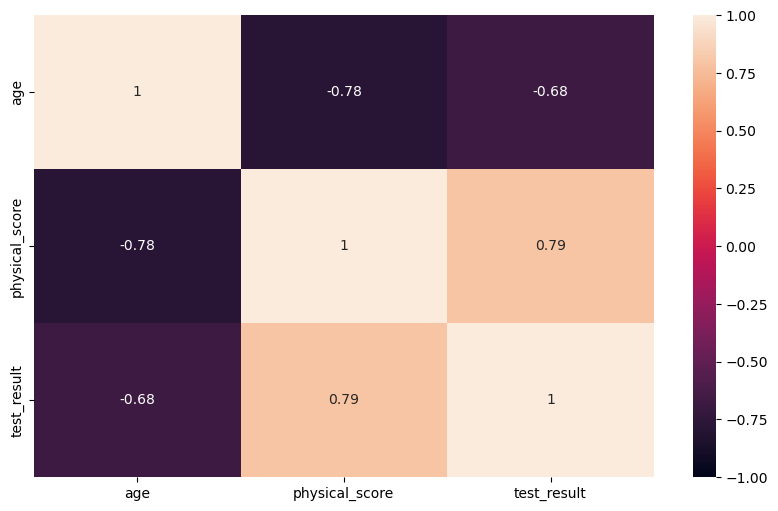

In [12]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1);

## Train | Test Split

In [13]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## Modelling

In [16]:
from sklearn.linear_model import LogisticRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [17]:
#help(LogisticRegression)

In [18]:
log_model = LogisticRegression()

In [19]:
log_model.fit(X_train, y_train)

LogisticRegression()

## Interpretation of coefficients

In [20]:
df.columns

Index(['age', 'physical_score', 'test_result'], dtype='object')

In [21]:
log_model.coef_

array([[-0.08365972,  0.43251827]])

In [22]:
log_model.intercept_

array([-9.35047287])

In [23]:
b2, b1 = log_model.coef_[0]
print("b2 (age coef)       :", b2)
print("b1 (physical_score) :", b1)

b2 (age coef)       : -0.08365972134083315
b1 (physical_score) : 0.4325182652459213


In [24]:
b0 = log_model.intercept_[0]
print("b0 (intercept) :", b0)

b0 (intercept) : -9.3504728727277


## Linear to Sigmoid Conversion

**The probability** that an event will occur is the possibility you expect to see that event in many trials.

**Probabilities** always range between 0 and 1.

**The odds** are defined as the probability that the event will occur divided by the probability that the event will not occur.

https://towardsdatascience.com/a-simple-interpretation-of-logistic-regression-coefficients-e3a40a62e8cf

In [25]:
def sigmoid(age, physical_score):

    log_odds = b2*age + b1*physical_score + b0 # b2*X2 + b1*X1 + b0
    probability = 1 / (1+np.exp(-log_odds))
    return probability

# Logistic regression converts classical linear regression equation (b2*X2 + b1*X1 +b0) into probability using the above function.

### The probability and odds of passing the hearing test for age = 33, physical_score= 40

In [26]:
probability_age_33_40 = sigmoid(33, 40)
probability_age_33_40

# A person who is 33 years old and has a physical score of 40 has a 99.45% probability of passing the hearing test.

0.9944560404714694

In [27]:
odds_age_33_ps_40 = probability_age_33_40 / (1-probability_age_33_40)
odds_age_33_ps_40

#probability of passing the hearing test / probability of failing in the hearing test


179.37649713237465

In [28]:
1/(1+np.exp(-np.log(odds_age_33_ps_40)))

0.9944560404714694

### The probability and odds of passing the hearing test for age = 34, physical_score= 40

In [29]:
probability_age_34_40 = sigmoid(34, 40)
probability_age_34_40


0.9939751954408242

In [30]:
odds_age_34_ps_40 = probability_age_34_40 / (1-probability_age_34_40)
odds_age_34_ps_40

164.98048786113793

In [31]:
odds_age_33_ps_40 / odds_age_34_ps_40

# 1 unit decrease in age will increase the probability of passing the hearing test as %8.7 based on the failing in the hearing test.

1.0872588598680448

## Modeling with Scaling Data

In [32]:
from sklearn.pipeline import Pipeline

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [33]:
pipe_model["logistic"].coef_
# we could also interpret on these coefficients, but this time our
# interpretations would be 1 z-score increase/decrease in age or physical score
# and would naturally be more difficult to understand.

array([[-0.94953524,  3.45991194]])

In [34]:
pipe_model["logistic"].intercept_

array([0.48867341])

In [35]:
df.head()

age  physical_score  test_result
0  33.0            40.7            1
1  50.0            37.2            1
2  52.0            24.7            0
3  56.0            31.0            0
4  35.0            42.9            1

In [36]:
y_pred = pipe_model.predict(X_test)
y_pred

# predict method predicts which classes the test data belongs to.

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [37]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

# The predict_proba method indicates with what probability the observations in the test data are assigned to which class.
# The first value indicates the probability of belonging to class 0, while the second value indicates the probability of belonging to class 1.
#  Whichever value is greater is assigned to that class.

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

## X_test + y_yest + y_pred + y_pred_proba

In [38]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

# First, we concatenate X_test and y_test to obtain the test_data df.

age  physical_score  test_result
1718  39.0            37.8            1
2511  45.0            38.7            1
345   56.0            21.8            0
2521  40.0            44.0            1
54    64.0            25.4            0
...    ...             ...          ...
4770  46.0            37.7            1
188   59.0            36.5            1
3335  54.0            22.8            0
4583  58.0            20.5            0
3208  48.0            24.7            0

[500 rows x 3 columns]

In [39]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

# And we add the pred_proba column/feature to the test_data df showing the probabilities of belonging to class 1.

age  physical_score  test_result  pred_proba
1718  39.0            37.8            1    0.976157
2511  45.0            38.7            1    0.973076
345   56.0            21.8            0    0.010806
2521  40.0            44.0            1    0.998092
54    64.0            25.4            0    0.024987
...    ...             ...          ...         ...
4770  46.0            37.7            1    0.955993
188   59.0            36.5            1    0.813195
3335  54.0            22.8            0    0.019392
4583  58.0            20.5            0    0.005285
3208  48.0            24.7            0    0.068507

[500 rows x 4 columns]

In [40]:
test_data["pred"] = y_pred
test_data

# While performing the predict operation, the model assigns probabilities greater than 0.5 and 0.5 in the background to class 1,
# and probabilities less than 0.5 to class 0.
# We add the predictions made by the model to the test_data df as a pred feature.

age  physical_score  test_result  pred_proba  pred
1718  39.0            37.8            1    0.976157     1
2511  45.0            38.7            1    0.973076     1
345   56.0            21.8            0    0.010806     0
2521  40.0            44.0            1    0.998092     1
54    64.0            25.4            0    0.024987     0
...    ...             ...          ...         ...   ...
4770  46.0            37.7            1    0.955993     1
188   59.0            36.5            1    0.813195     1
3335  54.0            22.8            0    0.019392     0
4583  58.0            20.5            0    0.005285     0
3208  48.0            24.7            0    0.068507     0

[500 rows x 5 columns]

In [41]:
test_data.sample(20)

age  physical_score  test_result  pred_proba  pred
4222  64.0            19.6            0    0.002179     0
2314  41.0            39.6            1    0.986711     1
109   45.0            41.6            1    0.991987     1
2781  51.0            39.1            1    0.962691     1
2889  45.0            28.0            0    0.277800     0
480   41.0            28.6            0    0.410280     0
1656  62.0            20.1            0    0.003187     0
4231  64.0            23.9            0    0.013375     0
2636  40.0            38.9            1    0.983612     1
4417  47.0            41.3            1    0.989254     1
1924  47.0            41.0            1    0.987812     1
3344  55.0            35.8            1    0.819293     1
2165  45.0            38.4            1    0.969530     1
969   49.0            32.2            1    0.620086     1
300   49.0            35.2            1    0.853661     1
4620  50.0            38.5            0    0.956069     1
3489  49.0            38.9            1    0.965594     1
3380  44.0            39.4            1    0.981460     1
3924  52.0            25.7            0    0.074251     0
971   61.0            18.4            0    0.001688     0

## Model Performance on Classification Tasks

In [42]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [43]:
accuracy_score(y_test,y_pred)

# This metric shows how much of the real values I know correctly in my data.

0.93

In [44]:
pipe_model.score(X_test, y_test)

# When we pass X_test, y_test into the score function, it returns an accuracy score.

0.93

In [45]:
precision_score(y_test, y_pred, pos_label=1)

# By default it returns precision_score of class 1. It shows how accurate the predictions made to predict the 1st class correctly.
# Precision 0.1 means that the model met 10% of its predictions.

# For the score belonging to class 0, it should be set as pos_label=0.

0.9331210191082803

In [46]:
recall_score(y_test, y_pred,  pos_label=1)

# By default it returns the recall_score of class 1. It shows how much of the model's 1 class can be detected correctly.
# recall 0.1 means that it only detected 10% of the model 1 class.

# For the score belonging to class 0, it should be set as pos_label=0

0.9543973941368078

In [47]:
f1_score(y_test, y_pred)

# Returns the harmonic mean of precision and recall scores. There is always a trade-off between precision and recall scores.
# If precision increases/decreases, recall decreases/increases.

0.9436392914653785

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [49]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

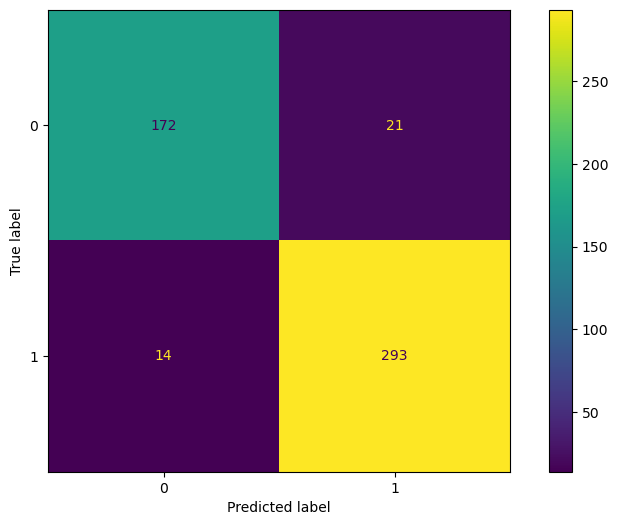

In [52]:
ConfusionMatrixDisplay.from_estimator(pipe_model,X_test, y_test);  #normalize='all'

# True label and predicted labels are shown on the axes
# TP, FP, TN, FN
# normalize="true" true Proportions relative to the label.
# normalize="pred" proportions relative to the predicted label.
# normalize="all" proportions to all data.

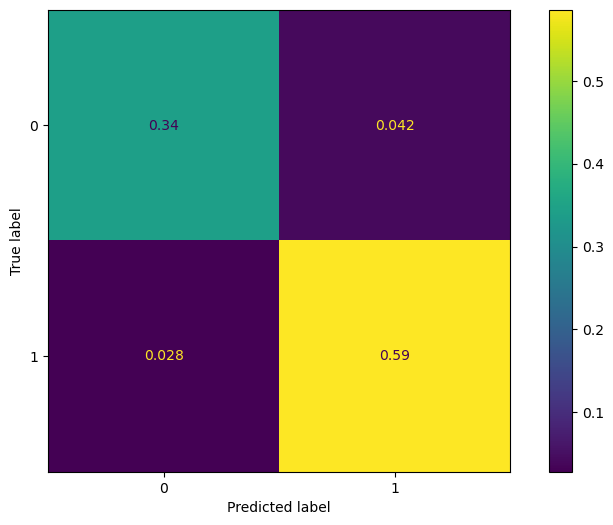

In [53]:
ConfusionMatrixDisplay.from_estimator(pipe_model,X_test, y_test, normalize='all');

In [54]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


In [55]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[172  21]
 [ 14 293]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500


Train_Set
[[1567  240]
 [ 147 2546]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



## Cross Validate

In [56]:
from sklearn.model_selection import cross_validate

In [57]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [58]:
model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = ['accuracy', 'precision','recall','f1'], 
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

# If we have applied scaling to our data, we do not forget that we must use pipeline in CV and gridsearch operations to prevent data leakage.

# Scores returned below are always scores for class 1.
# We need to do additional operations for CV scores of metrics belonging to class 0. We wil get to that in the next lesson.

fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
1   0.008033    0.009001       0.900000        0.915802        0.889273   
2   0.012695    0.008007       0.924444        0.912346        0.921429   
3   0.009485    0.008449       0.935556        0.911358        0.916955   
4   0.010939    0.012866       0.931111        0.912099        0.937500   
5   0.011841    0.010999       0.937778        0.911111        0.941392   
6   0.011843    0.012892       0.902222        0.916296        0.934363   
7   0.009903    0.008858       0.897778        0.916296        0.888502   
8   0.011760    0.011771       0.911111        0.914321        0.896194   
9   0.009945    0.012948       0.891111        0.916296        0.910448   
10  0.012691    0.013961       0.915556        0.914074        0.911032   

    train_precision  test_recall  train_recall   test_f1  train_f1  
1          0.915072     0.951852      0.947173  0.919499  0.930846  
2          0.911952     0.955556      0.944697  0.938182  0.928036  
3          0.912470     0.981481      0.942220  0.948122  0.927107  
4          0.911624     0.947955      0.944719  0.942699  0.927877  
5          0.911483     0.955390      0.943069  0.948339  0.927007  
6          0.915504     0.899628      0.947607  0.916667  0.931279  
7          0.916833     0.947955      0.945957  0.917266  0.931168  
8          0.913580     0.962825      0.946370  0.928315  0.929686  
9          0.916168     0.907063      0.946782  0.908752  0.931223  
10         0.913217     0.951673      0.946370  0.930909  0.929498

In [59]:
df_scores.mean()[2:]

test_accuracy      0.914667
train_accuracy     0.914000
test_precision     0.914709
train_precision    0.913790
test_recall        0.946138
train_recall       0.945496
test_f1            0.929875
train_f1           0.929373
dtype: float64

In [60]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# We decide whether these scores are really consistent or not by comparing them with the validation set scores we get from the CV.
# If the scores are close to each other, we can say that the scores of the test data are consistent.

Test_Set
[[172  21]
 [ 14 293]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500


Train_Set
[[1567  240]
 [ 147 2546]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

Purpose of ROC Curve:

    1. Analysing the strength/predictive power of a classifier.
    
    2. Determining optimal threshold.
    
    3. Comparing two models (using Area Under the Curve).

AUC represents a degree or measure of separability. It tells us how much the model is capable of distinguishing between classes.

The ROC Curve was first used during World War II for the analysis of radar signals. After the attack on Pearl Harbor, the US army began new research to improve the rate of detection of Japanese aircraft from their radar signals. Needless to say, they did not want to miss any of them. Neither did they wish to waste their resources on false alarms. They measured the ability of a radar receiver operator to make these predictions called the Receiver Operating Characteristic. That is the origin of the name. The purpose of the curve was similar to how we use it to improve our machine learning models now. The aim was to analyse the predictive power of the predictor in ensuring the detection of as many true positives as possible while minimizing false positives.

https://towardsdatascience.com/demystifying-roc-curves-df809474529a

## ROC AUC Curve

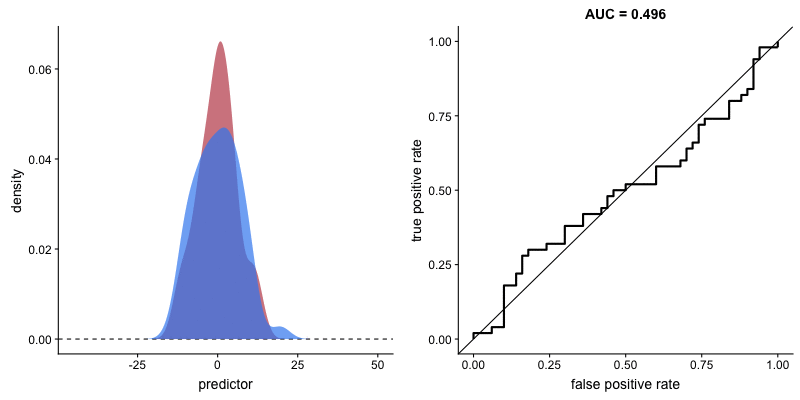


## ROC AUC and Precision Recall Curve
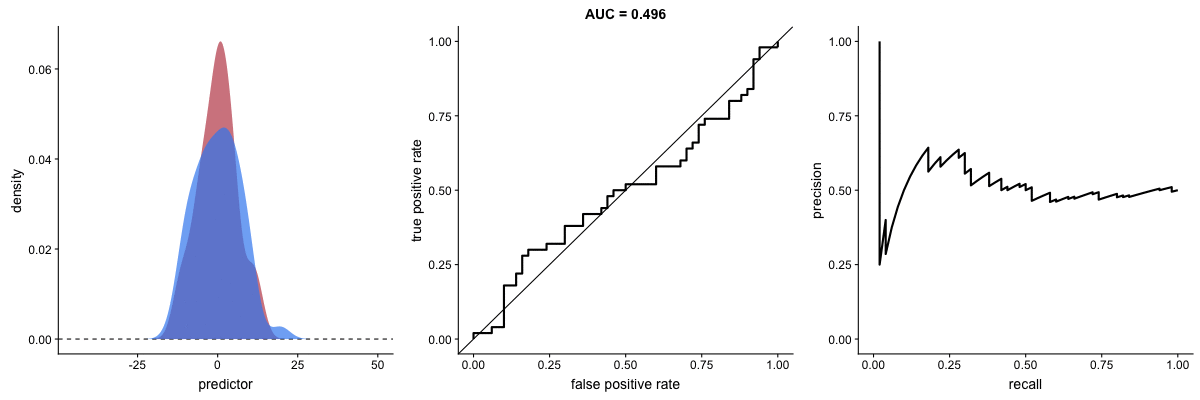


## For Imbalanced Data ROC AUC and Precsion-Recall Curve

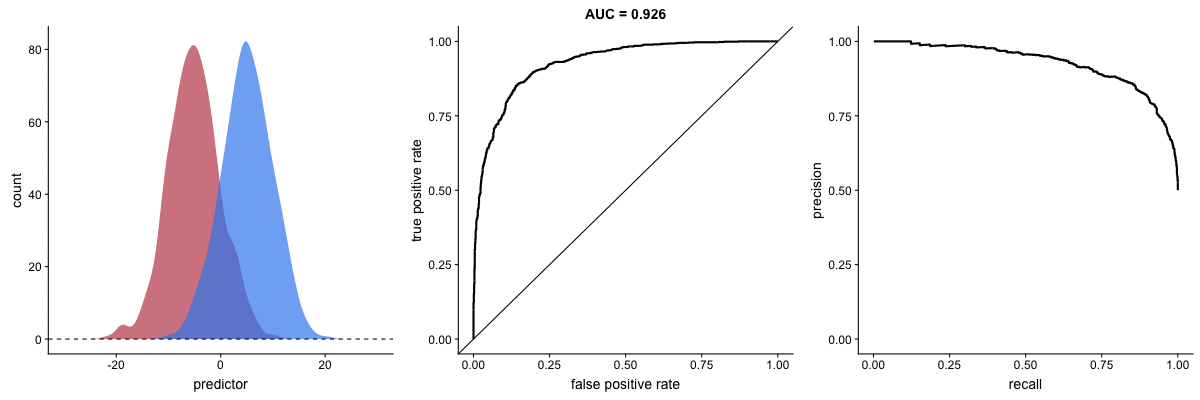

In [61]:
from sklearn.metrics import roc_auc_score, auc, roc_curve, RocCurveDisplay, PrecisionRecallDisplay

# While dealing with classification we use ROC-AUC score for balanced data sets,
                                       #    average precision score for unbalanced data sets.


# These scores shows how successful the model is in separating our target class from other class/classes.

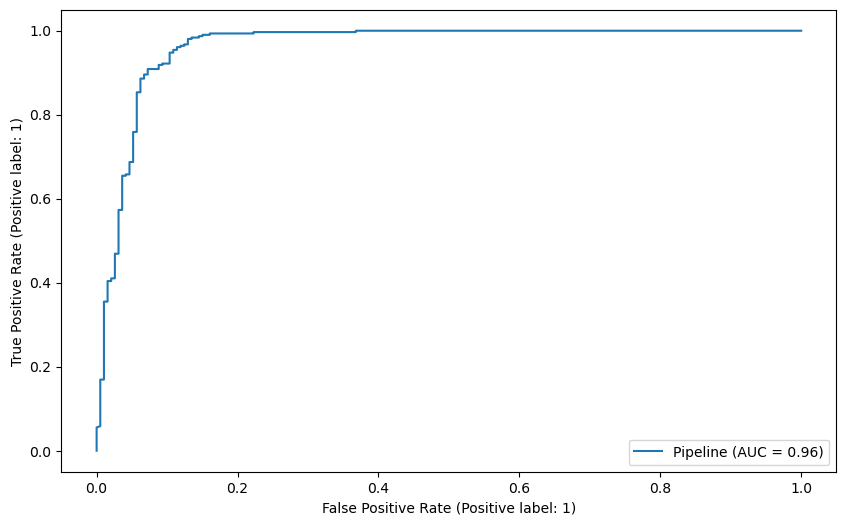

In [62]:
RocCurveDisplay.from_estimator(pipe_model, X_test, y_test);

# Since the data is balanced, we are looking at the AUC score.
# AUC =0.96 means my model is 96% successful on average in separating label 1 from label 0.

In [63]:
roc_auc_score(y_test, y_pred_proba[:,1])

# For the AUC score, y_test and the probabilities of belonging to class 1  are given to the roc_auc_score function.

0.9630132824762451

In [64]:
roc_auc_score(y_test, y_pred)

# if you give y_pred instead of y_pred_proba[:,1] see how it returns wrong result

0.9227945519906837

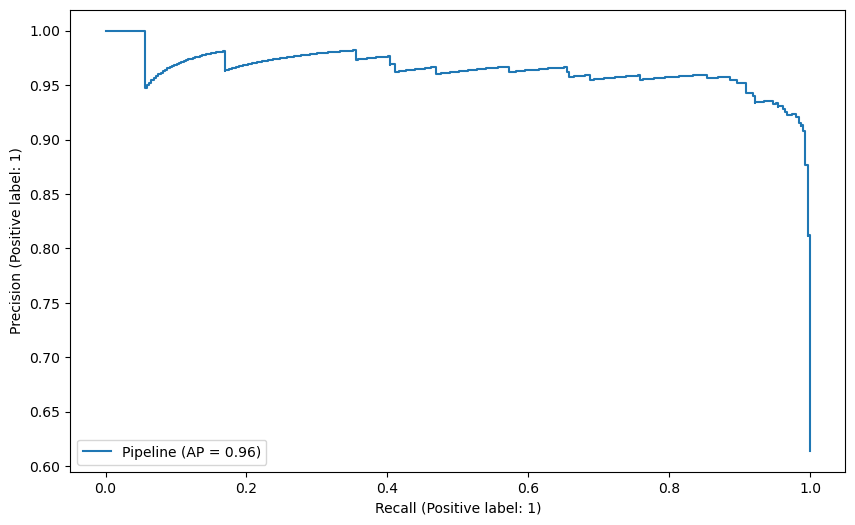

In [65]:
PrecisionRecallDisplay.from_estimator(pipe_model, X_test, y_test);

# Although both AUC score and Average precision score return values close to each other in balanced data sets,
# It is always good pratice to use AUC for balanced data sets and average precision scores for unbalanced data sets.

## Final Model and Model Deployment without Pipeline

In [66]:
scaler = StandardScaler().fit(X)

In [67]:
import pickle
pickle.dump(scaler, open("scaler_hearing", 'wb'))

In [68]:
X_scaled = scaler.transform(X)

In [69]:
final_model = LogisticRegression().fit(X_scaled, y)

In [70]:
pickle.dump(final_model, open("final_model_hearing", 'wb'))

In [71]:
my_dict = {"age": [20, 30, 40, 50, 60],
           "physical_score": [50, 30, 20, 10, 5]}

In [72]:
sample = pd.DataFrame(my_dict)
sample

age  physical_score
0   20              50
1   30              30
2   40              20
3   50              10
4   60               5

In [73]:
scaler_hearing = pickle.load(open("scaler_hearing", "rb"))

In [74]:
sample_scaled = scaler_hearing.transform(sample)
sample_scaled

array([[-2.80075819,  2.11038956],
       [-1.91469467, -0.33789511],
       [-1.02863115, -1.56203745],
       [-0.14256762, -2.78617979],
       [ 0.7434959 , -3.39825096]])

In [75]:
final_model = pickle.load(open("final_model_hearing", "rb"))

In [76]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [77]:
predictions

array([1, 1, 0, 0, 0], dtype=int64)

In [78]:
predictions_proba[:,1]

array([9.99970203e-01, 7.30358070e-01, 1.61805230e-02, 9.98533190e-05,
       5.25930939e-06])

## Final Model and Model Deployment with Pipeline

In [79]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [80]:
import pickle
pickle.dump(final_model, open("final_pipe_model", 'wb'))

In [81]:
new_model = pickle.load(open("final_pipe_model", "rb"))

In [82]:
new_model.predict(sample)

array([1, 1, 0, 0, 0], dtype=int64)

In [83]:
new_model.predict_proba(sample)[:,1]

array([9.99970203e-01, 7.30358070e-01, 1.61805230e-02, 9.98533190e-05,
       5.25930939e-06])

In [84]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:,1]
sample

age  physical_score  pred  pred_proba
0   20              50     1    0.999970
1   30              30     1    0.730358
2   40              20     0    0.016181
3   50              10     0    0.000100
4   60               5     0    0.000005

END OF THE PROJECT